In [21]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns
import numpy as np
import anndata

%load_ext lab_black
%load_ext autoreload
%autoreload 2

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
BASE_PATH = pathlib.Path("/storage/groups/ml01/workspace/anna.schaar/tissue/data/zhang")
DATA_PATH = ""

In [23]:
adata = sc.read(BASE_PATH / DATA_PATH / "preprocessed_zhang.h5ad")

In [24]:
adata.obs

,fovID,fov_x,fov_y,volume,center_x,center_y,slice_id,sample_id,label,subclass,class_label,mouse,slice,dataset,sample
point,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,13,4539.310,2986.899,992.830060,4738.397298,3075.327399,mouse2_slice31,dataset2_sample4,Astro_1,Astrocytes,Other,mouse2,slice31,dataset2,sample4
100001798412490480358118871918100400402,290,-4016.860,1404.780,610.091871,-3964.711404,1451.889047,mouse2_slice160,dataset2_sample5,Endo,Endothelial,Other,mouse2,slice160,dataset2,sample5
100006878605830627922364612565348097824,113,750.406,1143.102,148.277718,805.843523,1215.035473,mouse2_slice109,dataset2_sample6,SMC,SMC,Other,mouse2,slice109,dataset2,sample6
100007228202835962319771548915451072492,432,1262.680,-3752.030,249.515471,1348.686198,-3589.955255,mouse1_slice71,dataset1_sample2,Endo,Endothelial,Other,mouse1,slice71,dataset1,sample2
100009332472089331948140672873134747603,354,-3627.450,-1987.730,1779.831996,-3584.650904,-1883.105955,mouse2_slice219,dataset2_sample5,L23_IT_3,L23_IT,Glutamatergic,mouse2,slice219,dataset2,sample5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987465505639073211021560543065098772,386,774.760,913.600,1208.963097,890.666985,1069.905972,mouse1_slice251,dataset1_sample5,Pvalb_1,Pvalb,GABAergic,mouse1,slice251,dataset1,sample5
99989592830367590092304100078674096866,327,1910.380,1079.280,611.167089,1913.334949,1280.947292,mouse2_slice261,dataset2_sample3,L5_PT_5,L5_PT,Glutamatergic,mouse2,slice261,dataset2,sample3
99991756591196613545069880666241120777,89,3659.910,3432.540,130.928366,3847.387896,3589.662245,mouse1_slice112,dataset1_sample3,L45_IT_4,L45_IT,Glutamatergic,mouse1,slice112,dataset1,sample3


In [25]:
adata.obs.slice.unique()

['slice31', 'slice160', 'slice109', 'slice71', 'slice219', ..., 'slice301', 'slice70', 'slice260', 'slice261', 'slice20']
Length: 58
Categories (58, object): ['slice31', 'slice160', 'slice109', 'slice71', ..., 'slice70', 'slice260', 'slice261', 'slice20']

In [26]:
adata.obs["slice_idx"] = adata.obs.slice.str.replace("slice", "").astype(int).copy()

In [27]:
adata = adata[adata.obs.mouse == "mouse1"].copy()

/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [28]:
adata.obsm["spatial"] = adata.obs[["center_x", "center_y"]].to_numpy()
adata.obsm["spatial3d"] = np.stack(
    [
        adata.obsm["spatial"][:, 0].copy(),
        adata.obsm["spatial"][:, 1].copy(),
        adata.obs.slice_idx.values * 10,
    ],
    axis=1,
)

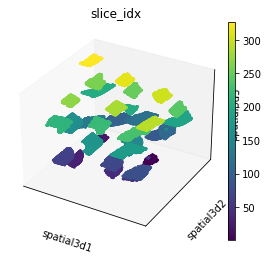

In [29]:
sc.pl.embedding(adata, basis="spatial3d", projection="3d", color="slice_idx")

In [38]:
adata.obs

,fovID,fov_x,fov_y,volume,center_x,center_y,slice_id,sample_id,label,subclass,class_label,mouse,slice,dataset,sample,slice_idx
point,,,,,,,,,,,,,,,,
100007228202835962319771548915451072492,432,1262.68,-3752.03,249.515471,1348.686198,-3589.955255,mouse1_slice71,dataset1_sample2,Endo,Endothelial,Other,mouse1,slice71,dataset1,sample2,71
100013893144618144270850756017896167367,381,-1077.16,1294.32,1054.872712,-1039.703952,1351.852047,mouse1_slice313,dataset1_sample6,L6_CT_1,L6_CT,Glutamatergic,mouse1,slice313,dataset1,sample6,313
100018547319796564052034805202079258035,511,3063.35,-2802.39,374.479721,3150.850899,-2715.925405,mouse1_slice153,dataset1_sample3,Peri,Pericytes,Other,mouse1,slice153,dataset1,sample3,153
100019180101435853096549957382098546223,617,-6709.44,1232.53,648.624511,-6657.679404,1287.926499,mouse1_slice201,dataset1_sample4,L5_PT_1,L5_PT,Glutamatergic,mouse1,slice201,dataset1,sample4,201
100023039956376282494130276516336349465,282,5956.17,-3205.97,696.353027,1005.624232,-2276.225406,mouse1_slice40,dataset1_sample1,Endo,Endothelial,Other,mouse1,slice40,dataset1,sample1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983502058944096412442332908885097416,267,6156.17,-4405.98,1666.977329,6227.104943,-4254.154255,mouse1_slice81,dataset1_sample2,L5_IT_4,L5_IT,Glutamatergic,mouse1,slice81,dataset1,sample2,81
99985816691327783828891364793469425625,443,-625.24,1713.60,1404.236471,-523.775515,1799.600974,mouse1_slice251,dataset1_sample5,Pvalb_4,Pvalb,GABAergic,mouse1,slice251,dataset1,sample5,251
99987222586328703024576373872583404495,41,4659.91,3032.54,236.124596,4765.904399,3240.331743,mouse1_slice112,dataset1_sample3,Astro_1,Astrocytes,Other,mouse1,slice112,dataset1,sample3,112


In [42]:
adata[adata.obs.sample_id == "dataset1_sample2"].obs.slice_id.unique()

['mouse1_slice71', 'mouse1_slice102', 'mouse1_slice81', 'mouse1_slice62', 'mouse1_slice91']
Categories (5, object): ['mouse1_slice71', 'mouse1_slice102', 'mouse1_slice81', 'mouse1_slice62', 'mouse1_slice91']

Trying to set attribute `.uns` of view, copying.


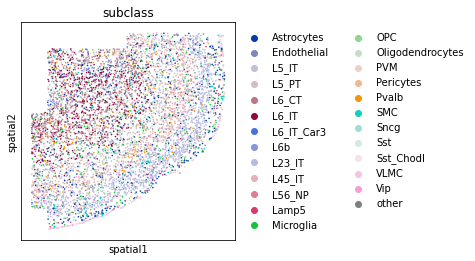

In [37]:
sc.pl.spatial(
    adata[adata.obs.slice_id == "mouse1_slice71"],
    color="subclass",
    spot_size=20,
    img_key=None,
)

In [34]:
adata

AnnData object with n_obs × n_vars = 161525 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'mouse', 'slice', 'dataset', 'sample', 'slice_idx'
    obsm: 'spatial', 'spatial3d'

In [11]:
adata.obs.slice_idx.unique()

array([ 71, 313, 153, 201,  40,   1, 102, 162, 221, 200, 283, 326,  50,
       112, 212, 271, 291,  31, 232,  10, 241, 251, 190,  81,  21, 131,
       122,  62, 180, 170,  91, 301, 260])

In [13]:
adata[adata.obs.slice_idx == 71].shape

/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(5749, 254)

/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


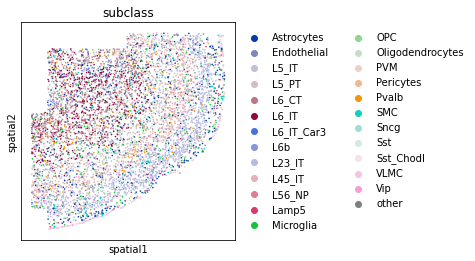

In [36]:
sc.pl.spatial(adata[adata.obs.slice_idx == 71], color="subclass", spot_size=20)

Trying to set attribute `.uns` of view, copying.


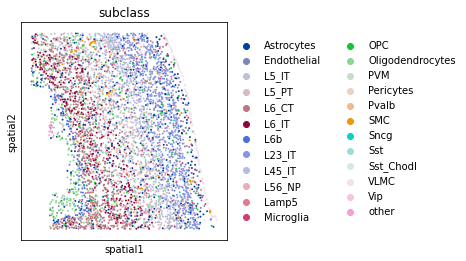

In [25]:
sc.pl.spatial(adata[adata.obs.slice_id=="mouse2_slice160"], color="subclass", spot_size=22)

In [41]:
adata.obsm["spatial"][:, 1].ptp()

11419.092817920075

In [ ]:
adata.obsm["spatial3d"] = adata.obsm["spatial"].copy(), 

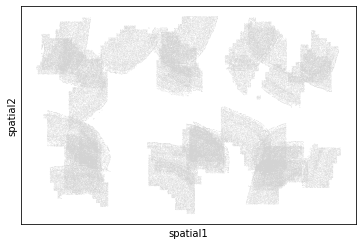

In [27]:
sc.pl.embedding(adata[adata.obs.mouse=="mouse1"],basis="spatial",)

In [5]:
adata = adata[adata.obs.embryo=="embryo1"].copy()

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [6]:
sel = adata.obs["celltype_mapped_refined"].value_counts()[adata.obs["celltype_mapped_refined"].value_counts() > 50].index.values
adata = adata[adata.obs["celltype_mapped_refined"].isin(sel)].copy()

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [7]:
adata.obs = adata.obs.drop(columns=['UMAP1', 'UMAP2','uniqueID', 'embryo', 'pos', 'z', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z',])

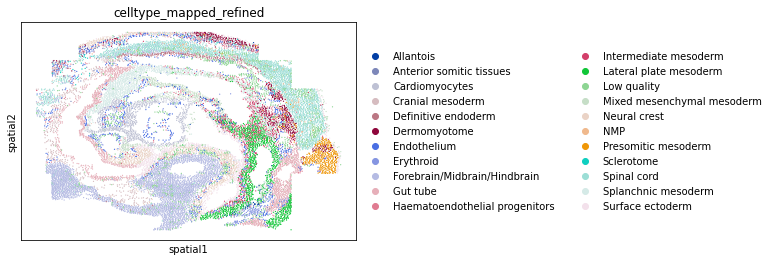

In [8]:
sc.pl.embedding(adata, color="celltype_mapped_refined", basis="spatial")

In [9]:
adata.raw = adata

In [10]:
adata.write("/Users/giovanni.palla/Datasets/tutorial_data/seqfish.h5ad")

In [3]:
adata = sc.read("/Users/giovanni.palla/Datasets/tutorial_data/seqfish.h5ad")
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'